In [1]:
from elements.edges import Project_Graph
from IPython.display import Image, display

graph = Project_Graph()
config = {"configurable": {"thread_id": "1"}}

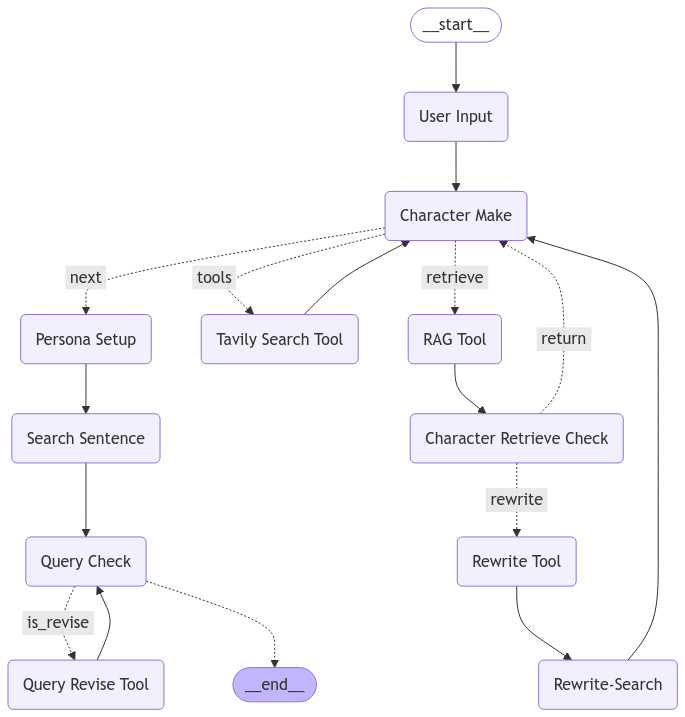

In [2]:
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
'가전디지털', '도서/음반/DVD', '문구/오피스', '뷰티', '생활용품', '식품', '완구/취미', '주방용품', '패션의류/잡화'

In [9]:
result = graph.invoke({"start_input": ""}, config)

================================= Make Persona =================================
페르소나를 결정합니다. 성별, 나이, 거주지, 취미 등 정보를 알려주세요.
==================================== INPUT ====================================
Human Input: 생활용품에 관심 많은 여자
============================= Chracter Information =============================
이 캐릭터는 32세의 여성으로, 서울에 거주하고 있습니다. 그녀는 생활용품에 대한 깊은 관심을 가지고 있으며, 특히 친환경 제품과 스마트 홈 기기에 매료되어 있습니다. 그녀는 대형 마트와 온라인 쇼핑몰에서 새로운 제품을 찾아보는 것을 즐기며, 주말에는 종종 플리마켓에 방문하여 독특한 생활용품을 수집합니다.

그녀는 인테리어 디자이너로 일하고 있으며, 자신의 집을 꾸미는 데에도 많은 시간을 투자합니다. 그녀의 집은 깔끔하고 세련된 스타일로 꾸며져 있으며, 방문객들은 항상 그녀의 센스에 감탄합니다. 그녀는 또한 DIY 프로젝트를 즐기며, 직접 만든 소품으로 집을 장식하는 것을 좋아합니다.

그녀의 취미는 요가와 독서이며, 특히 자기계발서와 인테리어 관련 서적을 즐겨 읽습니다. 그녀는 또한 환경 보호에 관심이 많아, 재활용과 업사이클링을 실천하고 있습니다. 그녀의 친구들은 그녀를 '생활용품 전문가'라고 부르며, 새로운 제품에 대한 조언을 구하곤 합니다.
================================= Persona Setup =================================
성별: 여성
나이: 32세
거주지: 서울
흥미: 친환경 제품과 스마트 홈 기기
취미: 요가와 독서
직업: 인테리어 디자이너
추가정보: 깔끔하고 세련된 스타일의 집을 꾸미며, DIY 프로젝트와 재활용에 관심이 많음.
=====

In [11]:
to_replay = None
for state in graph.get_state_history(config):
    print("Num Messages: ", len(state.values["messages"]), "Next: ", state.next)
    print("-" * 80)
    if len(state.values["messages"]) == 6:
        # We are somewhat arbitrarily selecting a specific state based on the number of chat messages in the state.
        to_replay = state

Num Messages:  12 Next:  ()
--------------------------------------------------------------------------------
Num Messages:  11 Next:  ('Query Check',)
--------------------------------------------------------------------------------
Num Messages:  11 Next:  ('Search Sentence',)
--------------------------------------------------------------------------------
Num Messages:  11 Next:  ('Persona Setup',)
--------------------------------------------------------------------------------
Num Messages:  10 Next:  ('Character Make',)
--------------------------------------------------------------------------------
Num Messages:  9 Next:  ('User Input',)
--------------------------------------------------------------------------------
Num Messages:  9 Next:  ('__start__',)
--------------------------------------------------------------------------------
Num Messages:  9 Next:  ()
--------------------------------------------------------------------------------
Num Messages:  8 Next:  ('Query Check',)


In [5]:
result

{'messages': [HumanMessage(content='아직까지 해결되지 않은 문제들만 남은 남자', additional_kwargs={}, response_metadata={}, id='1fdf6867-28b2-4cbf-9880-0876d8bb46b4'),
  AIMessage(content="이 캐릭터는 35세의 남성으로, 복잡한 문제들을 해결하는 데 열정을 가진 인물입니다. 그는 서울에 거주하며, 직업은 문제 해결 전문가로, 주로 기업이나 개인의 복잡한 문제를 해결하는 컨설팅 일을 하고 있습니다. 그의 일은 종종 창의적이고 논리적인 사고를 요구하며, 그는 이러한 도전에 큰 만족감을 느낍니다.\n\n그는 여가 시간에 퍼즐을 풀거나 체스를 두는 것을 좋아하며, 이러한 활동을 통해 문제 해결 능력을 더욱 향상시키고자 합니다. 또한, 그는 종종 철학 서적을 읽으며 인생의 복잡한 문제들에 대한 통찰을 얻고자 합니다. 그의 친구들은 그를 '문제 해결사'라고 부르며, 그는 언제나 주변 사람들의 문제를 해결해 주는 데 기꺼이 시간을 할애합니다.\n\n그의 목표는 언젠가 자신의 문제 해결 방법론을 책으로 출판하여 더 많은 사람들에게 도움을 주는 것입니다. 그는 끊임없이 배우고 성장하며, 해결되지 않은 문제들을 하나씩 해결해 나가는 것을 삶의 큰 보람으로 여깁니다.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 256, 'prompt_tokens': 245, 'total_tokens': 501, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_token

In [ ]:
import os
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup


In [62]:
def setup_browser():
    # ChromeDriver 자동 설치
    service = Service(ChromeDriverManager().install())
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # 브라우저를 헤드리스 모드로 실행 (백그라운드 실행)
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    driver = webdriver.Chrome(service=service, options=options)
    return driver

In [63]:
driver = setup_browser()

In [64]:
def coupang_item_name(query:str):
    url = f"https://www.coupang.com/np/search?component=&q={query}&channel=user"
    driver.get((url))
    element = None
    while element is None:
        try:
            xpath = "/html/body/div[3]/section/form/div[2]/div[2]/ul"
            element = driver.find_element(By.XPATH, xpath)
        except Exception as e:
            time.sleep(1)
            
    soup = BeautifulSoup(element.get_attribute('outerHTML'), 'html.parser')
    li_elements = soup.find_all('li', class_='search-product')

    result_list = []
    for li in li_elements:
        name = li.find('div', class_='name')
        if name:
            result = name.get_text(strip=True)
            result_list.append(result)
            
    driver.close()
    return result_list


In [ ]:
keyword = "남성용 바지 ㅋㅋ"
result = coupang_item_name(keyword)

In [66]:
result

['언탭트 남성용 마약스판 밴딩 카고 빅사이즈 면바지',
 '씨쏘 남성용 히든밴딩 감격 슬랙스 팬츠',
 '어나더디 남성용 일자 스판 밴딩 팬츠',
 '로코비전 1+1 남성 냉감 바지 링클프리 시원한 여름 아이스 스판 밴딩 빅사이즈 슬랙스',
 '맨즈에버 따뜻한 겨울 융털 기모 남자 스판 바지 밴딩 팬츠',
 '맨즈에버 따뜻한 겨울 융털 기모 남자 스판 바지 밴딩 팬츠',
 '민트스쿨 봄가을용 남성 일자 카고 작업팬츠 면카고 빅사이즈 S~4XL',
 '민트스쿨 캐주얼 빅사이즈 밴딩 통바지 와이드 팬츠 30~44인치까지',
 '에이플심플 겨울 기모바지 블랙',
 '디커스텀 남성용 울트라 스판 조거 팬츠',
 '브라운스튜디오 남성용 무지 일자 운동복 져지 스판 트레이닝 바지',
 '언탭트 남성용 사계절 빅사이즈 마약 면 스판 원단 바지',
 '자코모 남성용 대박 스판 밴딩 팬츠',
 '오마보이 남성용 PR 밴딩 스판 팬츠',
 '제타22 남성용 프리미엄 스판 세미 와이드 기본 밴딩 슬랙스 바지 [1055]',
 '핏콕 남성용 슈퍼스판 편안한 스판 면바지',
 '스댕클럽 남성용 밴드 스판 조거 카고바지 SBJ0277',
 '가이스토리 남성용 스판 빅사이즈 와이즈 면바지',
 '가이스토리 남성용 어닝 치노 면바지',
 '언탭트 남성용 무지 일자 스판 트레이닝 바지',
 '언탭트 남성용 마약스판 밴딩 카고 빅사이즈 면바지',
 '트랜드원 더블업 작업용 양털 기모 혹한기 방수 방풍 겨울 방한바지',
 '레이먼 남성용 로베 밴딩 스판 슬랙스 롱',
 '캐럿 남성용 융털 기모 밴딩 팬츠',
 '가비진 남성용 일자 롱 팬츠',
 '퍼스트클로 정말 편한 허리밴딩 플러스 오버올 남성 면 코튼 스판 바지 통 빅사이즈 남자팬츠 THE0001',
 '허벅스 남성용 피그먼트 와이드 밴딩 배기 팬츠',
 '씨쏘 남성용 리턴2 울트라스판 긴바지',
 '씨쏘 남성용 히든밴딩 10부 슬랙스',
 '맨즈에버 따뜻한 겨울 융털 기모 남자 스판 바지 밴딩 팬츠',
 '마른파이브 남성용 융털 기모바지

In [ ]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode

with open('./api_key/TAVILY_API.txt', 'r') as api:
    os.environ["TAVILY_API_KEY"] = api.read()
    
tool = TavilySearchResults(
    # tool을 호출 하는 경우 어떤 이름으로 호출할지에 대한 것. 기본값은 tavily_search_results_json 임
    name="example_tavily_name",
    # 해당 Description이 기본값
    description="A search engine optimized for co" "Useful for when you need to answ" "Input should be a search query.",
    # 검색 출력의 개수
    max_results=3)
tool_node = ToolNode(tools=[tool])

In [68]:
tool.invoke("랭그래프가 뭐야?")

[{'url': 'https://m.blog.naver.com/dabomai/223605684205',
  'content': "랭그래프가 무엇인가? 2달 전에 랭체인을 공부할 수 있는 기회를 얻었습니다. 항상 '공부해야지~공부해야지~' 하다가 시간이 나서 이때다 싶어 바로 Docs를 키고 튜토리얼을 따라 하며 공부했습니다. 이때 전까지만 해도 랭체인에서 지원하는 RAG, 대화 기록 보존"},
 {'url': 'https://teddylee777.github.io/langchain/langchain-tutorial-08/',
  'content': '⑥ 테스트\n태그:\nChatGPT,\nChatOpenAI,\nGPT3.5,\nGPT4,\nlangchain,\nlangchain tutorial,\nOpenAI,\nPDF,\n랭체인,\n랭체인 튜토리얼,\n문서요약,\n질의응답,\n크롤링\n카테고리:\nlangchain\n업데이트: 2023년 10월 13일\n참고\n[Assistants API] Code Interpreter, Retrieval, Functions 활용법\n2024년 02월 13일\n35 분 소요\nOpenAI의 LangChain 한국어 튜토리얼\n바로가기 👀\n랭체인(langchain) + PDF 기반 질의응답(Question-Answering) (8)\n2023년 10월 13일\n2 분 소요\n이번 포스팅에서는 랭체인(LangChain) 을 활용하여 PDF 문서를 로드하고, 문서의 내용에 기반하여 질의응답(Question-Answering) 하는 방법에 대해 알아보겠습니다.\n 후반부에는 langchain hub 에서 프롬프트를 다운로드 받고, 이를 ChatGPT 모델과 결합하여 문서에 기반한 질의응답 Chain 을 생성합니다.\n✔️ (이전글) LangChain 튜토리얼\n🌱 환경설정\n🔥 PDF 기반 질의 응답(Question-Answering)\n다음은 비구조화된 데이터를 QA 체인(Question-Answering chain) 으로 변환